In [1]:
#first to import important libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'C:\\Users\\os'

In [2]:
# reading our dataset

data = pd.read_csv("Fraud.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
print(data.dtypes.value_counts())

float64    5
int64      3
object     3
dtype: int64


In [5]:
data.describe().round(1)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0
mean,243.4,179861.9,833883.1,855113.7,1100701.7,1224996.4,0.0,0.0
std,142.3,603858.2,2888242.7,2924048.5,3399180.1,3674128.9,0.0,0.0
min,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,156.0,13389.6,0.0,0.0,0.0,0.0,0.0,0.0
50%,239.0,74871.9,14208.0,0.0,132705.7,214661.4,0.0,0.0
75%,335.0,208721.5,107315.2,144258.4,943036.7,1111909.2,0.0,0.0
max,743.0,92445516.6,59585040.4,49585040.4,356015889.4,356179278.9,1.0,1.0


In [6]:
any_nan = data.isna().any()

# Count the number of NaN values in each column
nan_count = data.isna().sum()
print(any_nan[any_nan])

Series([], dtype: bool)


In [7]:
print(nan_count)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [8]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

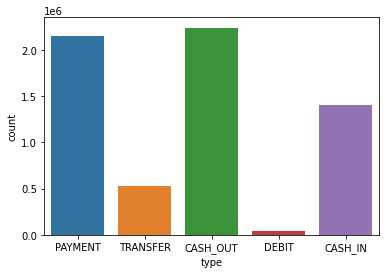

In [9]:
sns.countplot(x='type', data=data)

<AxesSubplot:xlabel='type', ylabel='amount'>

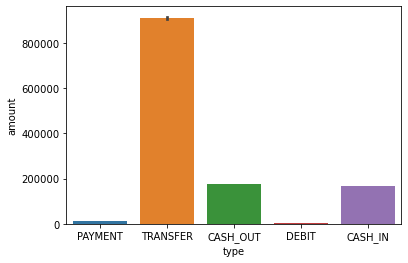

In [10]:
sns.barplot(x="type", y="amount", data=data)

C:\Users\os\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='step', ylabel='Density'>

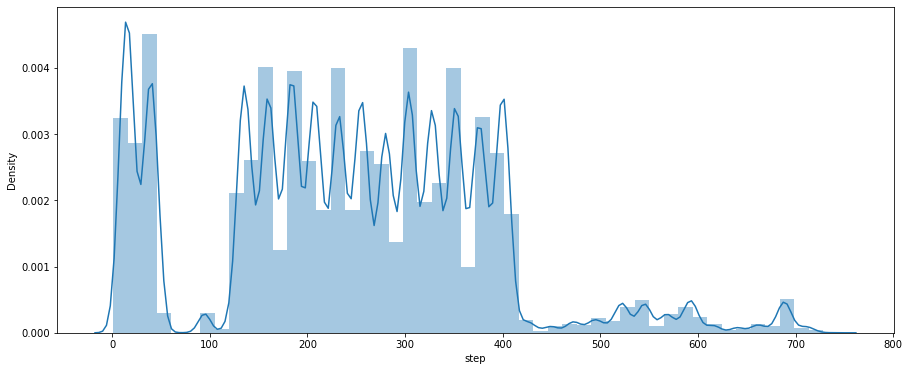

In [11]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)

In [12]:
type_new = pd.get_dummies(data['type'], drop_first=True)
df = pd.concat([data, type_new], axis=1)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [13]:
X = df.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = df['isFraud']



In [14]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [15]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [16]:
# multicolinearity analysis 

corr_matrix=X.corr()
corr_matrix

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.003277,-0.012918,0.002869,0.004926,0.006925
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.012295,-0.004376,-0.023379,-0.197444,0.365896
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.003835,-0.200899,-0.021450,-0.189486,-0.081593
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,0.003776,-0.210977,-0.021872,-0.193915,-0.087355
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.000513,0.086028,0.009347,-0.231455,0.130476
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,-0.000529,0.093476,0.006346,-0.238315,0.191701
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,1.000000,-0.001168,-0.000128,-0.001133,0.005245
CASH_OUT,-0.012918,-0.004376,-0.200899,-0.210977,0.086028,0.093476,-0.001168,1.000000,-0.059625,-0.526422,-0.222672
DEBIT,0.002869,-0.023379,-0.021450,-0.021872,0.009347,0.006346,-0.000128,-0.059625,1.000000,-0.057868,-0.024478
PAYMENT,0.004926,-0.197444,-0.189486,-0.193915,-0.231455,-0.238315,-0.001133,-0.526422,-0.057868,1.000000,-0.216110


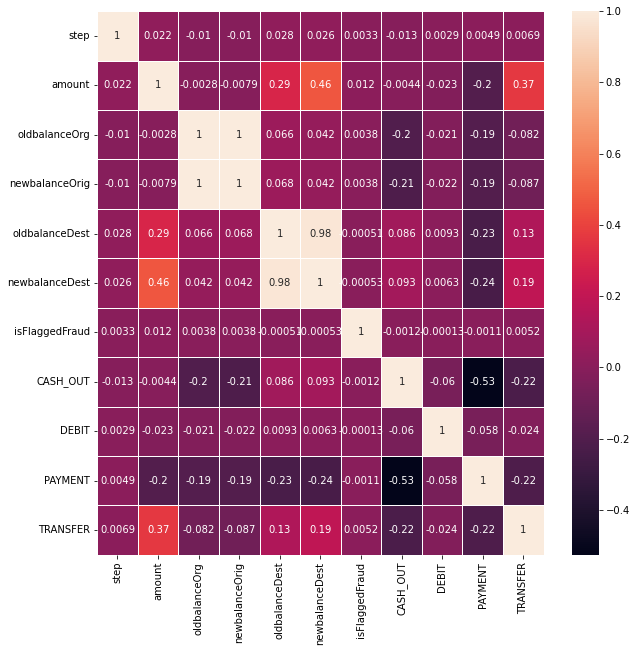

In [17]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr_matrix, annot = True, linewidths=.5, ax=ax)

plt.show()

In [18]:
#outlier detection
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFlaggedFraud  int64  
 7   CASH_OUT        uint8  
 8   DEBIT           uint8  
 9   PAYMENT         uint8  
 10  TRANSFER        uint8  
dtypes: float64(5), int64(2), uint8(4)
memory usage: 364.1 MB


In [19]:
print(X.dtypes.value_counts())

float64    5
uint8      4
int64      2
dtype: int64


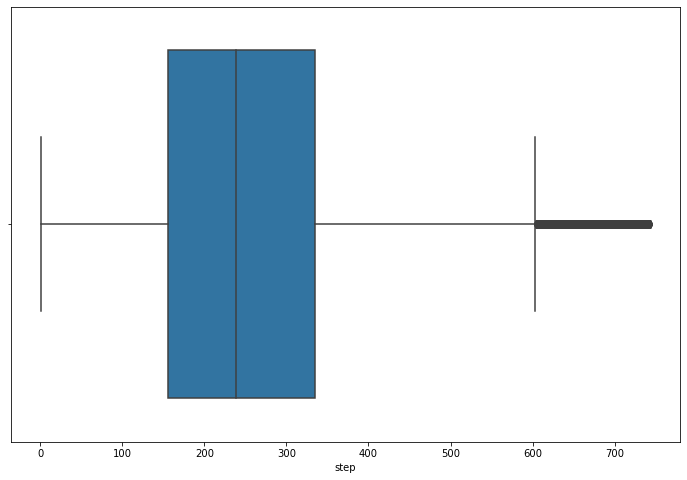

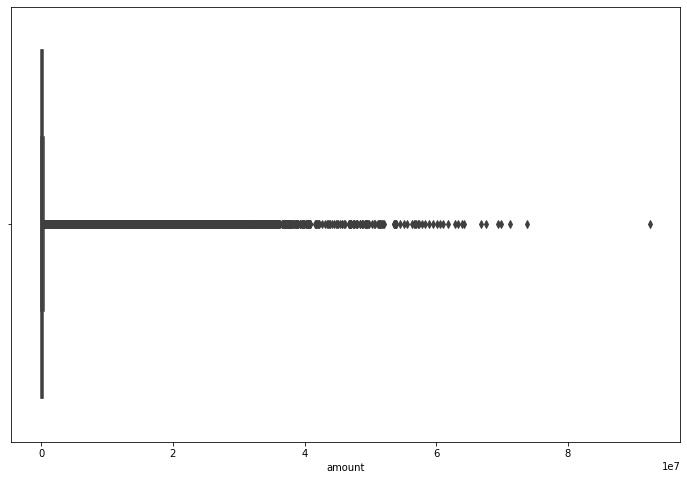

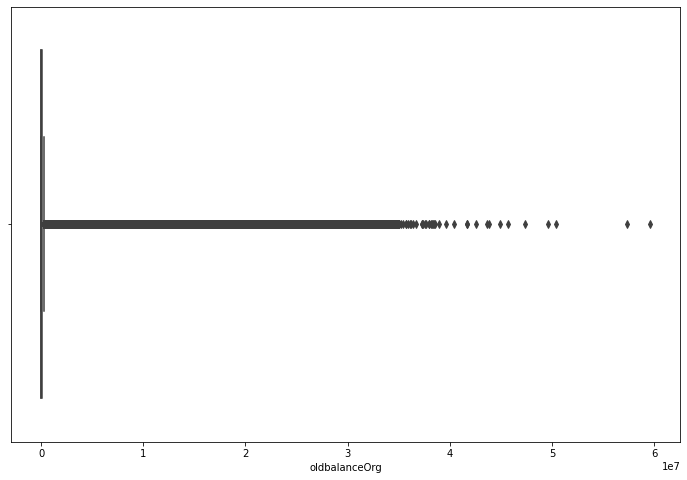

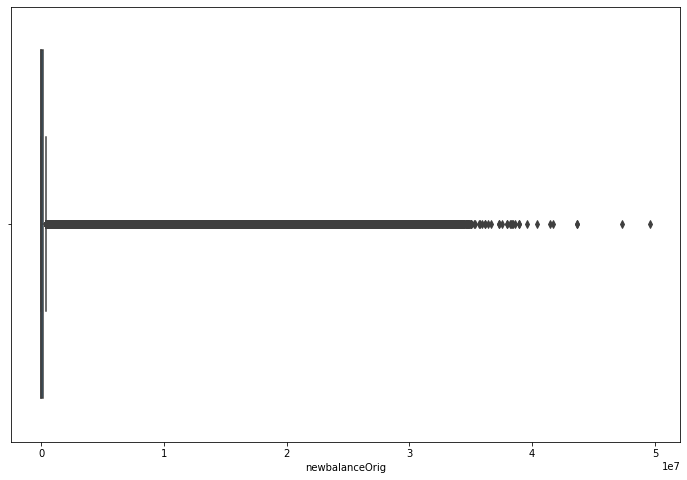

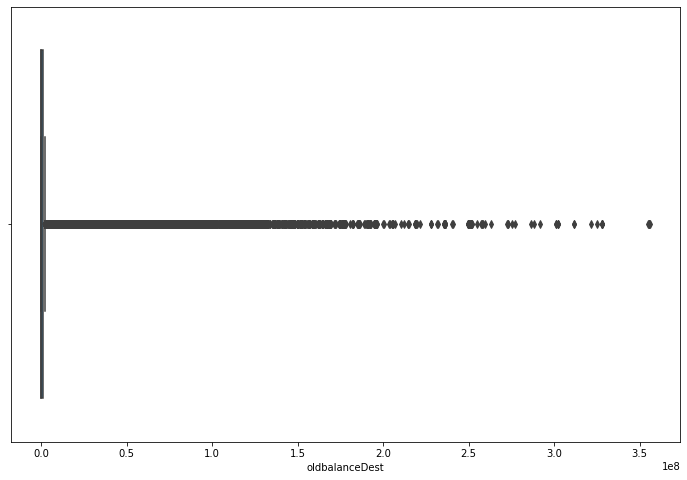

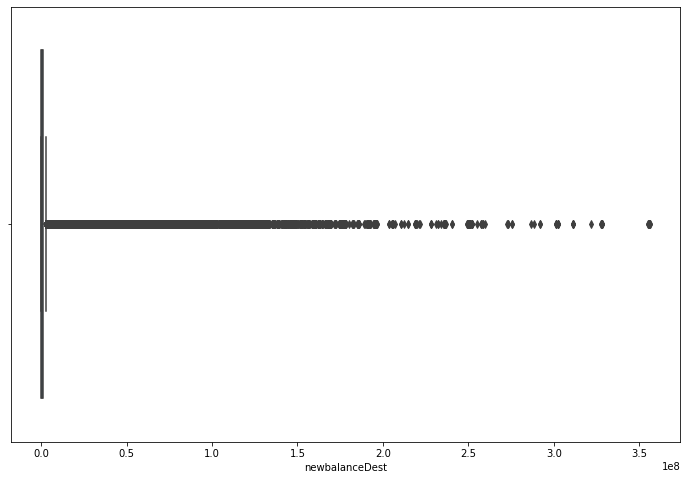

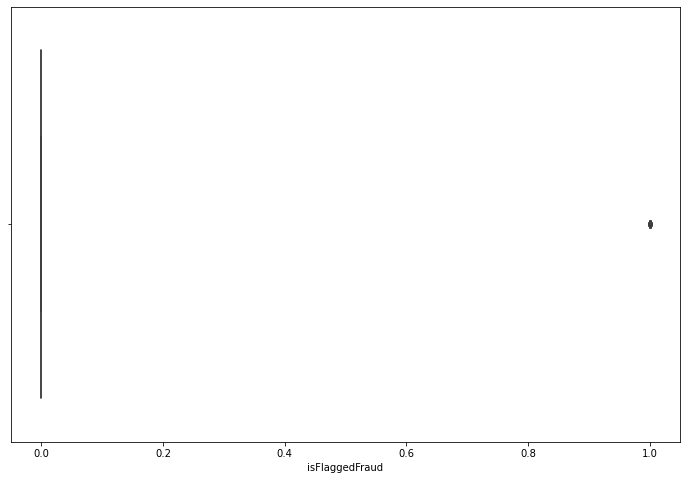

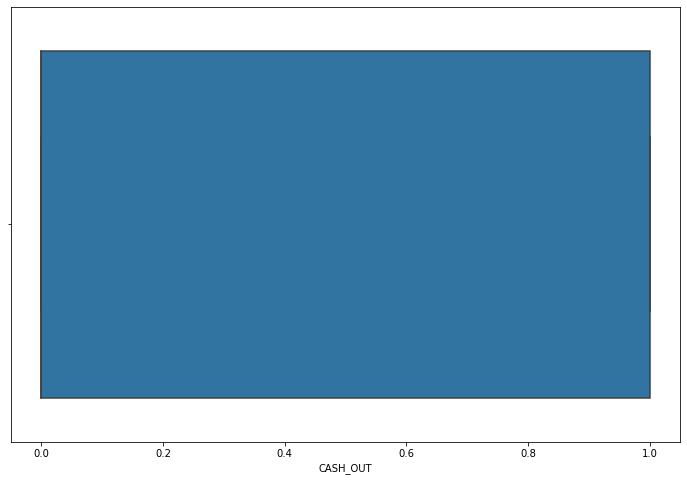

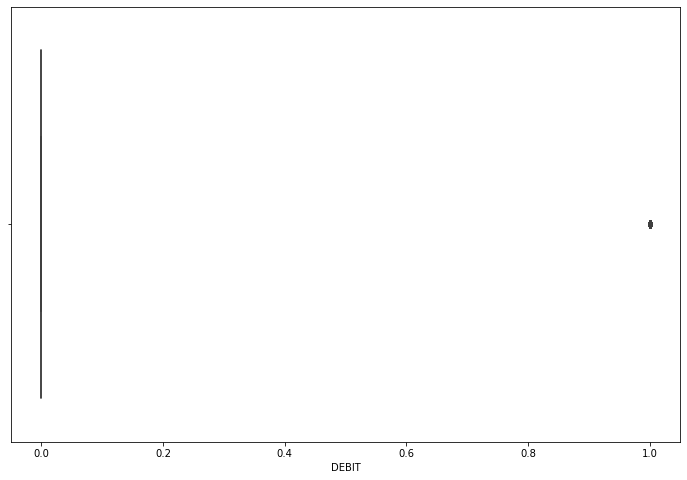

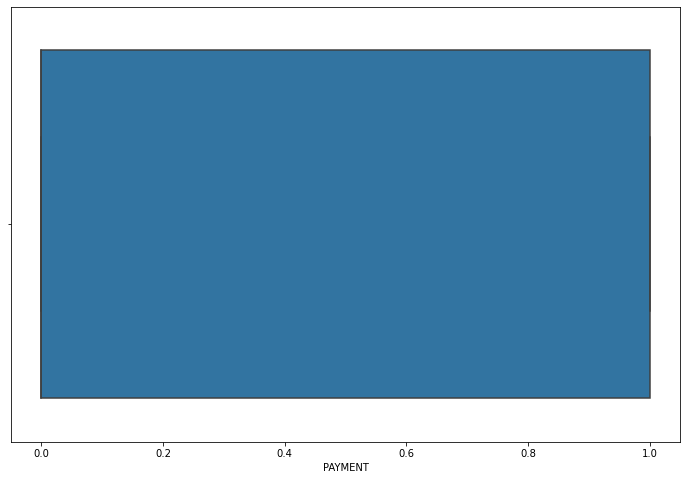

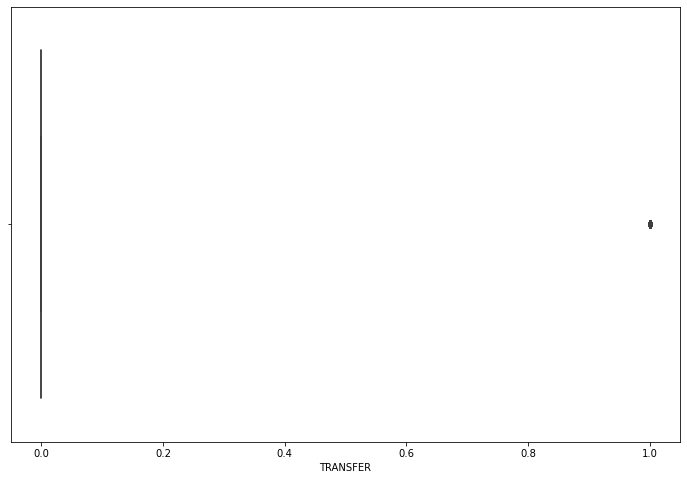

In [20]:
# Create a boxplot for each column

for col in X.columns:
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.boxplot(x=col, data=X, ax=ax)
    

    plt.show()

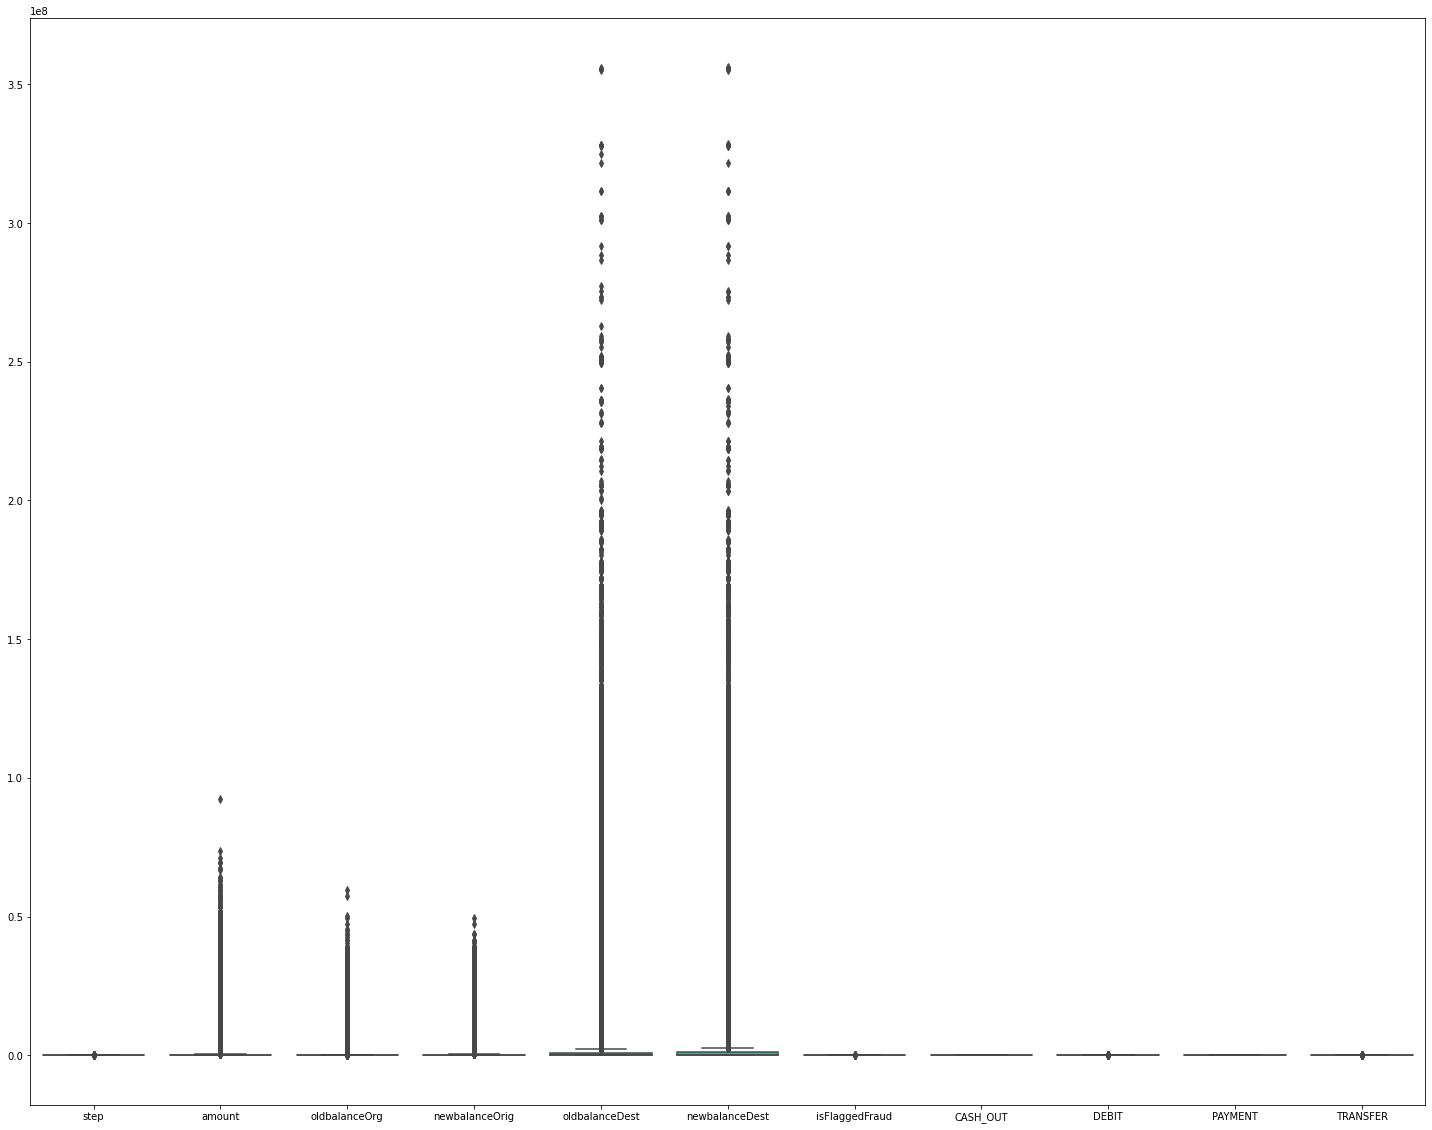

In [21]:
fig, ax = plt.subplots(figsize=(25, 20))
sns.boxplot(data=X, ax=ax)
plt.show()

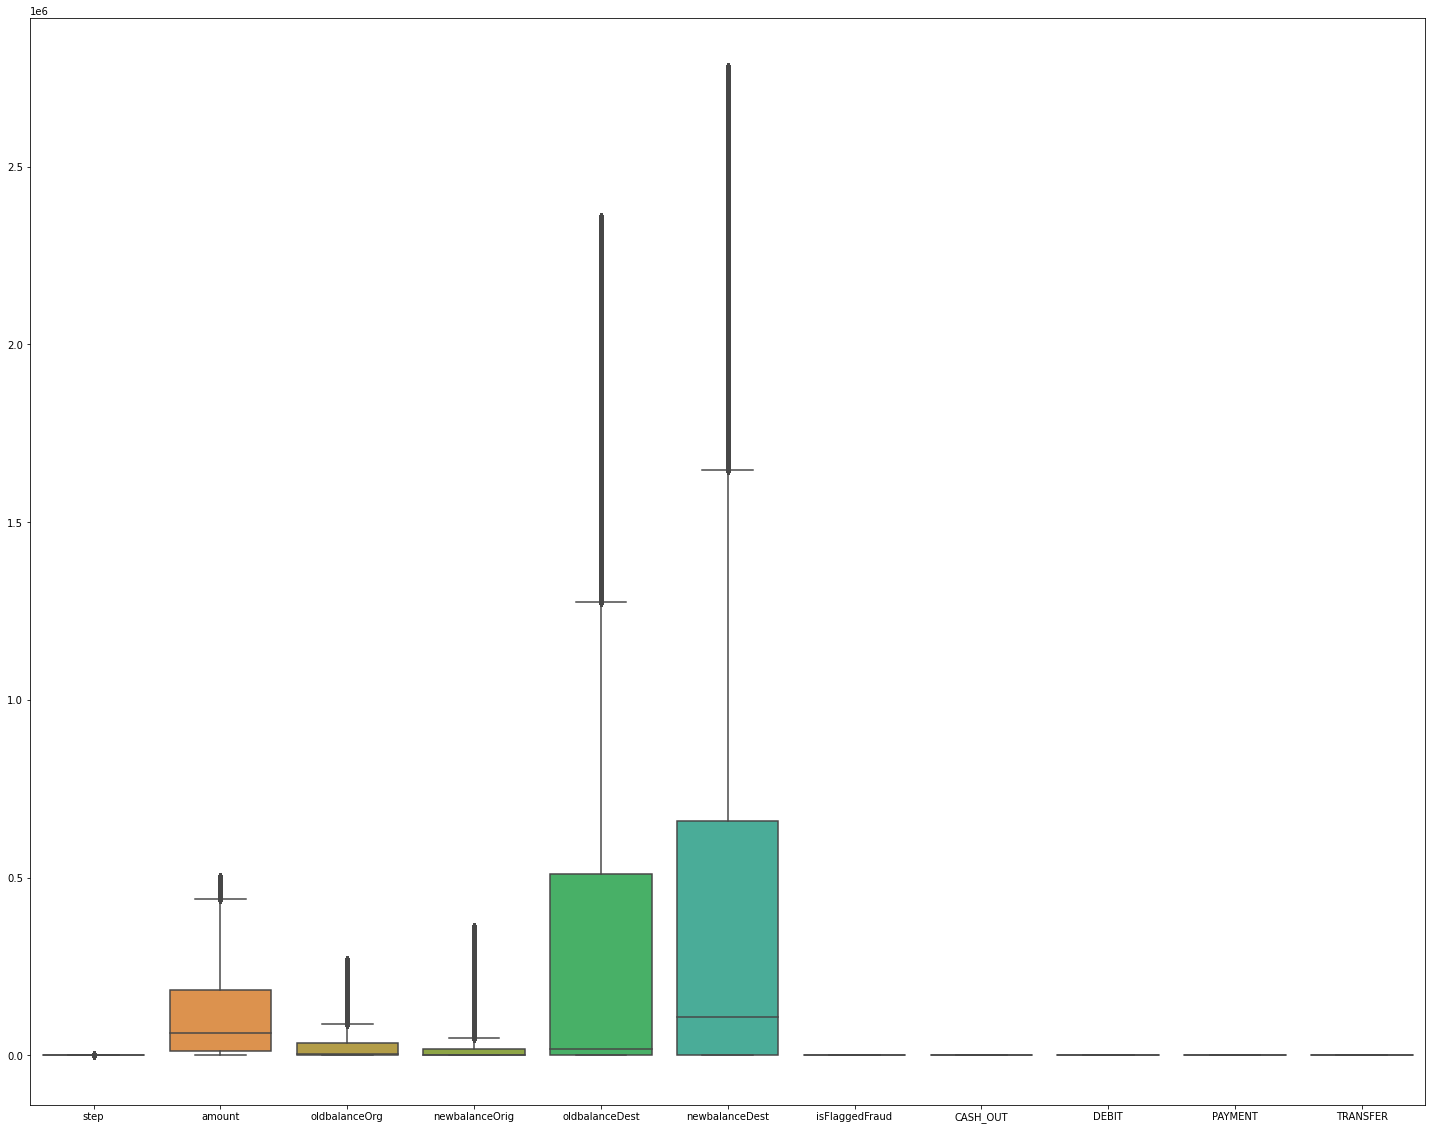

In [22]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
X = X[(X >= lower_bound) & (X <= upper_bound)]


fig, ax = plt.subplots(figsize=(25, 20))
sns.boxplot(data=X, ax=ax)
plt.show()

In [23]:
y.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

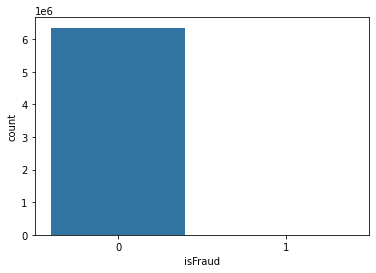

In [24]:
sns.countplot(x=y) #highly imbalanced 

In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with imputer and SMOTE
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
])

# Fit and transform the training data using the pipeline
X_train_imputed = pipeline.fit_transform(X_train)
X_test_imputed = pipeline.transform(X_test)

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

# Check the class distribution after resampling
print(pd.Series(y_train_resampled).value_counts())

# Now you can use X_train_resampled and y_train_resampled for training your model


0    5083503
1    5083503
Name: isFraud, dtype: int64


In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [28]:
models = [LogisticRegression(), XGBClassifier(),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy', 
                                 random_state=7)]
 
for i in range(len(models)):
    models[i].fit(X_train_resampled, y_train_resampled)
    print(f'{models[i]} : ')
     
    train_preds = models[i].predict_proba(X_train_resampled)[:, 1]
    print('Training Accuracy : ', ras(y_train_resampled, train_preds))
     
    y_preds = models[i].predict_proba(X_test_imputed)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()

LogisticRegression() : 
Training Accuracy :  0.908467936245822
Validation Accuracy :  0.9106724192939596

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9999002269633339
Validation Accuracy :  0.9989807398590899

RandomForestClassifier(criterion='entropy', n_esti

1. Data cleaning including missing values, outliers and multi-collinearity.
   
Missing Values: Imputation methods (such as mean, median, and mode) were used. 
Outliers: Using Boxplot, identify outliers and apply the IQR approach to address them correctly.
Multi-collinearity: Identified strongly correlated features using methods like correlation analysis and correlation matrices.

2. Describe your fraud detection model in elaboration.

The fraud detection model is a supervised machine learning model, such as logistic regression, random forest, or gradient boosting classifier.
It makes use of transaction data from the past to identify trends that point to fraud.
Features might include the quantity of transactions, how often they occur, where the money is located, what kind of payment is made, how the user behaves, etc.
Every transaction is given a probability, or score, by the model that indicates the possibility of fraud.

3. How did you select variables to be included in the model?

Techniques for selecting features, such as correlation analysis and feature importance, can be applied.
Features that are known to be important in fraud detection or that exhibit a strong link with fraudulent activity are chosen.

4. Demonstrate the performance of the model by using best set of tools.

Used methods such as cross-validation to verify the generalization capacity of the model.
Analyzed the model's performance using accuracy from training and validation.

5. What are the key factors that predict fraudulent customer?

Unusual transaction numbers, frequent transactions, activities coming from unknown locations, and abnormal user behavior patterns are some examples of potential indicators of fraudulent activity.

6. Do these factors make sense? If yes, How? If not, How not?

These features undoubtedly correspond with typical fraudulent activities, including large-scale transactions, frequent location changes, and departures from typical user behavior. But in order to continue to be effective against new and emerging fraud strategies, the model needs to be constantly evaluated and improved.

7. What kind of prevention should be adopted while company update its infrastructure?

Updating and maintaining infrastructure on a regular basis will address security flaws.
Provide ongoing education and awareness campaigns to enable staff members to spot and report fraudulent activity.
To improve security, implement multi-factor authentication and other robust authentication techniques.
Use real-time anomaly detection techniques to spot and report unusual activity.

8. Assuming these actions have been implemented, how would you determine if they work?give the answers for above given options.

To assess fraud detection and prevention effectiveness, monitor metrics like fraudulent cases, false positives, and fraud detection time. Regular audits and evaluations are crucial. Comparing performance indicators before and after implementation helps evaluate the impact of prevention measures.